# Idea 1

## Subarray defenition
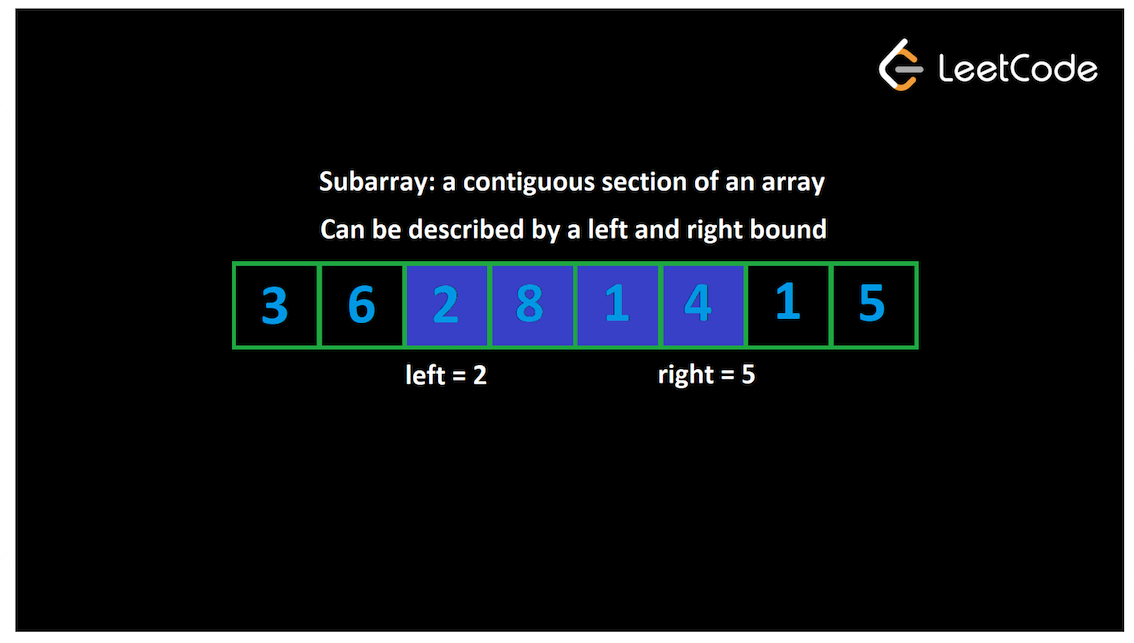

## When should we use sliding window?

There is a very common group of problems involving subarrays that can be solved efficiently with sliding window. Let's talk about how to identify these problems.

**First**, the problem will either explicitly or implicitly define criteria that make a subarray "valid". There are 2 components regarding what makes a subarray valid:
* A constraint metric. This is some attribute of a subarray. It could be the sum, the number of unique elements, the frequency of a specific element, or any other attribute.
* A numeric restriction on the constraint metric. This is what the constraint metric should be for a subarray to be considered valid.

For example, let's say a problem declares a subarray is valid if it has a sum less than or equal to 10. The constraint metric here is the sum of the subarray, and the numeric restriction is <= 10. A subarray is considered valid if its constraint metric conforms to the numeric restriction, i.e. the sum is less than or equal to 10.

**Second**, the problem will ask you to find valid subarrays in some way.

The most common task you will see is finding the best valid subarray. The problem will define what makes a subarray better than another. For example, a problem might ask you to find the longest valid subarray.

*Whenever a problem description talks about subarrays, you should figure out if sliding window is a good option by analyzing the problem description. If you can find the things mentioned above, then it's a good bet.*

Here is a preview of some of the example problems that we will look at in this article, to help you better understand what sliding window problems look like:

* Find the longest subarray with a sum less than or equal to k;
* Find the longest substring that has at most one "0";
* Find the number of subarrays that have a product less than k.

## The algorithm

The idea behind a sliding window is to consider only valid subarrays. Recall that a subarray can be defined by a left bound (the index of the first element) and a right bound (the index of the last element). In sliding window, we maintain two variables left and right, which at any given time represent the current subarray under consideration.

Initially, we have left = right = 0, which means that the first subarray we look at is just the first element of the array on its own. We want to expand the size of our "window", and we do that by incrementing right. When we increment right, this is like "adding" a new element to our window.

But what if after adding a new element, the subarray becomes invalid? We need to "remove" some elements from our window until it becomes valid again. To "remove" elements, we can increment left, which shrinks our window.

As we add and remove elements, we are "sliding" our window along the input from left to right. The window's size is constantly changing - it grows as large as it can until it's invalid, and then it shrinks. However, it always slides along to the right, until we reach the end of the input.

```python
function fn(arr):
    left = 0
    for (int right = 0; right < arr.length; right++):
        Do some logic to "add" element at arr[right] to window

        while WINDOW_IS_INVALID:
            Do some logic to "remove" element at arr[left] from window
            left++

        Do some logic to update the answer
```

## Example 1
**Given an array of positive integers `nums` and an integer `k`, find the length of the longest subarray whose sum is less than or equal to `k`.**

In [1]:
def find_length(nums, k):
    left = 0
    ans = 0
    cur_sum = 0

    for right in range(len(nums)):
        cur_sum += nums[right]
        while cur_sum > k:
            cur_sum -= nums[left]
            left += 1
        ans = max(ans, right - left + 1)
    return ans

In [2]:
find_length([3, 1, 2, 7, 4, 2, 1, 1, 5], 8)

4

## Example 2 

**You are given a binary string `s` (a string containing only `"0"` and `"1"`). You may choose up to one `"0"` and flip it to a `"1"`. What is the length of the longest substring achievable that contains only `"1"`?**

For example, given `s = "1101100111"`, the answer is `5`. If you perform the flip at index `2`, the string becomes `1111100111`.

In [3]:
# another words we have to find the longest subarray with no more then one zero

def find_length_ones(s):
    left = 0
    ans = 0
    zeros_cnt = 0

    for right in range(len(s)):
        if s[right] == '0':
            zeros_cnt += 1
            
        while zeros_cnt > 1:
            if s[left] == '0':
                zeros_cnt -= 1
            left += 1
        ans = max(ans, right - left + 1)
    return ans

In [4]:
find_length_ones('1101100111')

5

In [6]:
find_length_ones('110')

3

In [7]:
find_length_ones('0')

1

In [8]:
find_length_ones('')

0

In [9]:
find_length_ones('0000')

1

In [10]:
find_length_ones('111111')

6

# Idea 2 Number of subarrays

If a problem asks for the number of subarrays that fit some constraint, we can still use sliding window, but we need to use a neat math trick to calculate the number of subarrays.

Let's say that we are using the sliding window algorithm we have learned and currently have a window `(left, right)`. How many valid windows end at index `right`?

There's the current window `(left, right)`, then `(left + 1, right)`, `(left + 2, right)`, and so on until `(right, right)` (only the element at `right`).

You can fix the `right` bound and then choose any value between `left` and `right` inclusive for the `left` bound. Therefore, the number of valid windows ending at index `right` is equal to the size of the window, which we know is **`right - left + 1`**.

## Example 3 ([713. Subarray Product Less Than K](https://leetcode.com/problems/subarray-product-less-than-k/))

**Given an array of positive integers `nums` and an integer `k`, return the number of subarrays where the product of all the elements in the subarray is strictly less than `k`.**

For example, given the input `nums = [10, 5, 2, 6]`, `k = 100`, the answer is `8`. The subarrays with products less than `k` are:

`[10], [5], [2], [6], [10, 5], [5, 2], [2, 6], [5, 2, 6]`

In [14]:
def num_subarray_product_less_k(nums, k):
    # nums[i] >= 1, so we can't get any subarr with product strictly less then 1
    if k <= 1:
        return 0
        
    left = 0
    ans = 0
    cur_product = 1

    for right in range(len(nums)):
        cur_product *= nums[right]
        while cur_product >= k:
            cur_product /= nums[left]
            left += 1
        ans += right - left + 1
    return ans

In [15]:
num_subarray_product_less_k([10, 5, 2, 6], 100)

8

In [16]:
num_subarray_product_less_k([10, 5], 1)

0

In [17]:
num_subarray_product_less_k([1], 0)

0

# Idea 3 Fixed window size

In the examples we looked at above, our window size was dynamic. We tried to expand it to the `right` as much as we could while keeping the window within some constraint and removed elements from the `left` when the constraint was violated. Sometimes, a problem will specify a fixed length `k`.

These problems are easy because the difference between any two adjacent windows is only two elements (we add one element on the right and remove one element on the left to maintain the length).

Start by building the first window (from index `0` to `k - 1`). Once we have a window of size `k`, if we add an element at index `i`, we need to remove the element at index `i - k`. For example, `k = 2` and you currently have elements at indices `[0, 1]`. Now, we add 2: `[0, 1, 2]`. To keep the window size at `k = 2`, we need to remove `2 - k = 0`: `[1, 2]`.

```python
function fn(arr, k):
    curr = some data to track the window

    // build the first window
    for (int i = 0; i < k; i++)
        Do something with curr or other variables to build first window

    ans = answer variable, probably equal to curr here depending on the problem
    for (int i = k; i < arr.length; i++)
        Add arr[i] to window
        Remove arr[i - k] from window
        Update ans

    return ans
```

## Example 4 

**Given an integer array `nums` and an integer `k`, find the sum of the subarray with the largest sum whose length is `k`.**

In [18]:
def find_best_subarray(nums, k):
    window_sum = 0
    for i in range(k):
        window_sum += nums[i]

    max_sum = window_sum
    for i in range(k, len(nums)):
        window_sum -= nums[i - k]
        window_sum += nums[i]
        max_sum = max(max_sum, window_sum)
    return max_sum

In [19]:
find_best_subarray([3, -1, 4, 12, -8, 5, 6], 4)

18

# Homework

## Problem 1 ([643. Maximum Average Subarray I](https://leetcode.com/problems/maximum-average-subarray-i/description/))

In [2]:
def find_max_average(nums: list[int], k: int) -> float:
        window_sum = 0
        for i in range(k):
            window_sum += nums[i]
        
        ans = window_sum
        for i in range(k, len(nums)):
            window_sum += nums[i] - nums[i - k]
            ans = max(ans, window_sum)
        return ans / k

In [3]:
find_max_average([1, 12, -5, -6, 50, 3], 4)

12.75

In [4]:
find_max_average([1, 2, 3], 3)

2.0

## Problem 2 ([1004. Max Consecutive Ones III](https://leetcode.com/problems/max-consecutive-ones-iii/description/))

In [5]:
def longest_ones(nums: list[int], k: int) -> int:
    left = 0
    zeros_cnt = 0
    ans = 0

    for right in range(len(nums)):
        if nums[right] == 0:
            zeros_cnt += 1
        while zeros_cnt > k:
            if nums[left] == 0:
                zeros_cnt -= 1
            left += 1
        ans = max(ans, right - left + 1)
    return ans 

In [6]:
longest_ones([1, 1, 0, 0, 1, 0, 0, 0], 2)

5

## Problem 3 ([209. Minimum Size Subarray Sum](https://leetcode.com/problems/minimum-size-subarray-sum/description/))

In [7]:
def min_sub_array_len(target: int, nums: list[int]) -> int:
    left = 0 
    ans = float('inf')
    cur_sum = 0

    for right in range(len(nums)):
        cur_sum += nums[right]
        while cur_sum >= target:
            ans = min(ans, right - left + 1)
            cur_sum -= nums[left]
            left += 1
    return 0 if ans == float('inf') else ans 

In [10]:
min_sub_array_len(7, [2, 3, 1, 2, 4, 3])

2

## Problem 4 ([1456. Maximum Number of Vowels in a Substring of Given Length](https://leetcode.com/problems/maximum-number-of-vowels-in-a-substring-of-given-length/description/))

In [11]:
def max_vowels(s: str, k: int) -> int:
    vowel_letters = {'a', 'e', 'i', 'o', 'u'}
    vowel_cnt = 0
    for i in range(k):
        if s[i] in vowel_letters:
            vowel_cnt += 1
            
    ans = vowel_cnt
    for i in range(k, len(s)):
        if s[i] in vowel_letters:
            vowel_cnt += 1
        if s[i - k] in vowel_letters:
            vowel_cnt -= 1
        ans = max(ans, vowel_cnt)
    return ans

In [13]:
max_vowels('abciiidef', k=3)

3

## Problem 5 ([1208. Get Equal Substrings Within Budget](https://leetcode.com/problems/get-equal-substrings-within-budget/description/))

In [14]:
def equal_substring(s: str, t: str, max_cost: int) -> int:
    cur_cost = 0
    left = 0
    ans = 0

    for right in range(len(s)):
        cur_cost += abs(ord(s[right]) - ord(t[right]))
        while cur_cost > max_cost:
            cur_cost -= abs(ord(s[left]) - ord(t[left]))
            left += 1
        ans = max(ans, right - left + 1)
    return ans 

In [15]:
equal_substring('abcd', 'bcdf', 3)

3